# 22. GRADUATE ADMISSIONS: EXPLORATIVE DATA ANALYSIS
---

## 1. Introducing the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

admission = pd.read_csv('data/Admission2_train')
print('Rows, Columns:', admission.shape)
print('Missing Values:', admission.isnull().sum().sum())
admission.head()

Rows, Columns: (400, 8)
Missing Values: 0


,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,LOR,Chance of Admit
0,321,111,3,3.5,8.83,1,4.0,0.77
1,316,111,4,4.0,8.54,0,5.0,0.71
2,303,102,3,3.5,8.50,0,3.0,0.62
3,314,107,2,2.5,8.27,0,4.0,0.72
4,308,106,3,3.5,8.21,1,2.5,0.75


## 2. Exploring Correlation

In [2]:
corr_matrix = admission.corr()
sorted_corr = corr_matrix['Chance of Admit'].sort_values(ascending=False)
sorted_corr

Chance of Admit      1.000
CGPA                 0.878
GRE Score            0.821
TOEFL Score          0.789
SOP                  0.680
University Rating    0.679
LOR                  0.627
Research             0.544
Name: Chance of Admit, dtype: float64

Text(0.5, 0, 'Features')

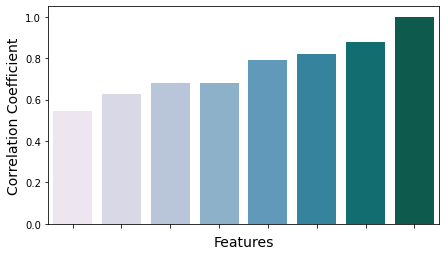

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7,4))
ax = sns.barplot(x=sorted_corr.index, y=sorted_corr.values, 
                 data=sorted_corr, palette='PuBuGn')
ax.get_xaxis().set_ticklabels([])
plt.ylabel('Correlation Coefficient', size=14)
plt.xlabel('Features', size=14)

## 3. Correlation Heatmap

<AxesSubplot:>

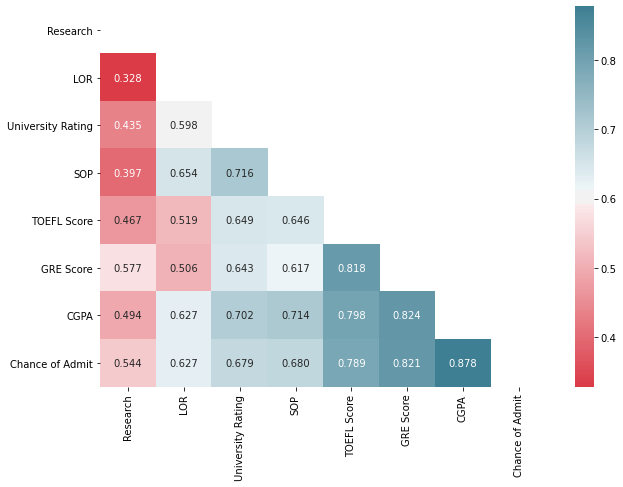

In [4]:
sorted_corr_ = corr_matrix['Chance of Admit'].sort_values()
corr = admission[sorted_corr_.index].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, mask=mask, cmap=color, annot=True, 
            fmt=".3f", annot_kws={"size": 10})

## 4. Correlation Plots

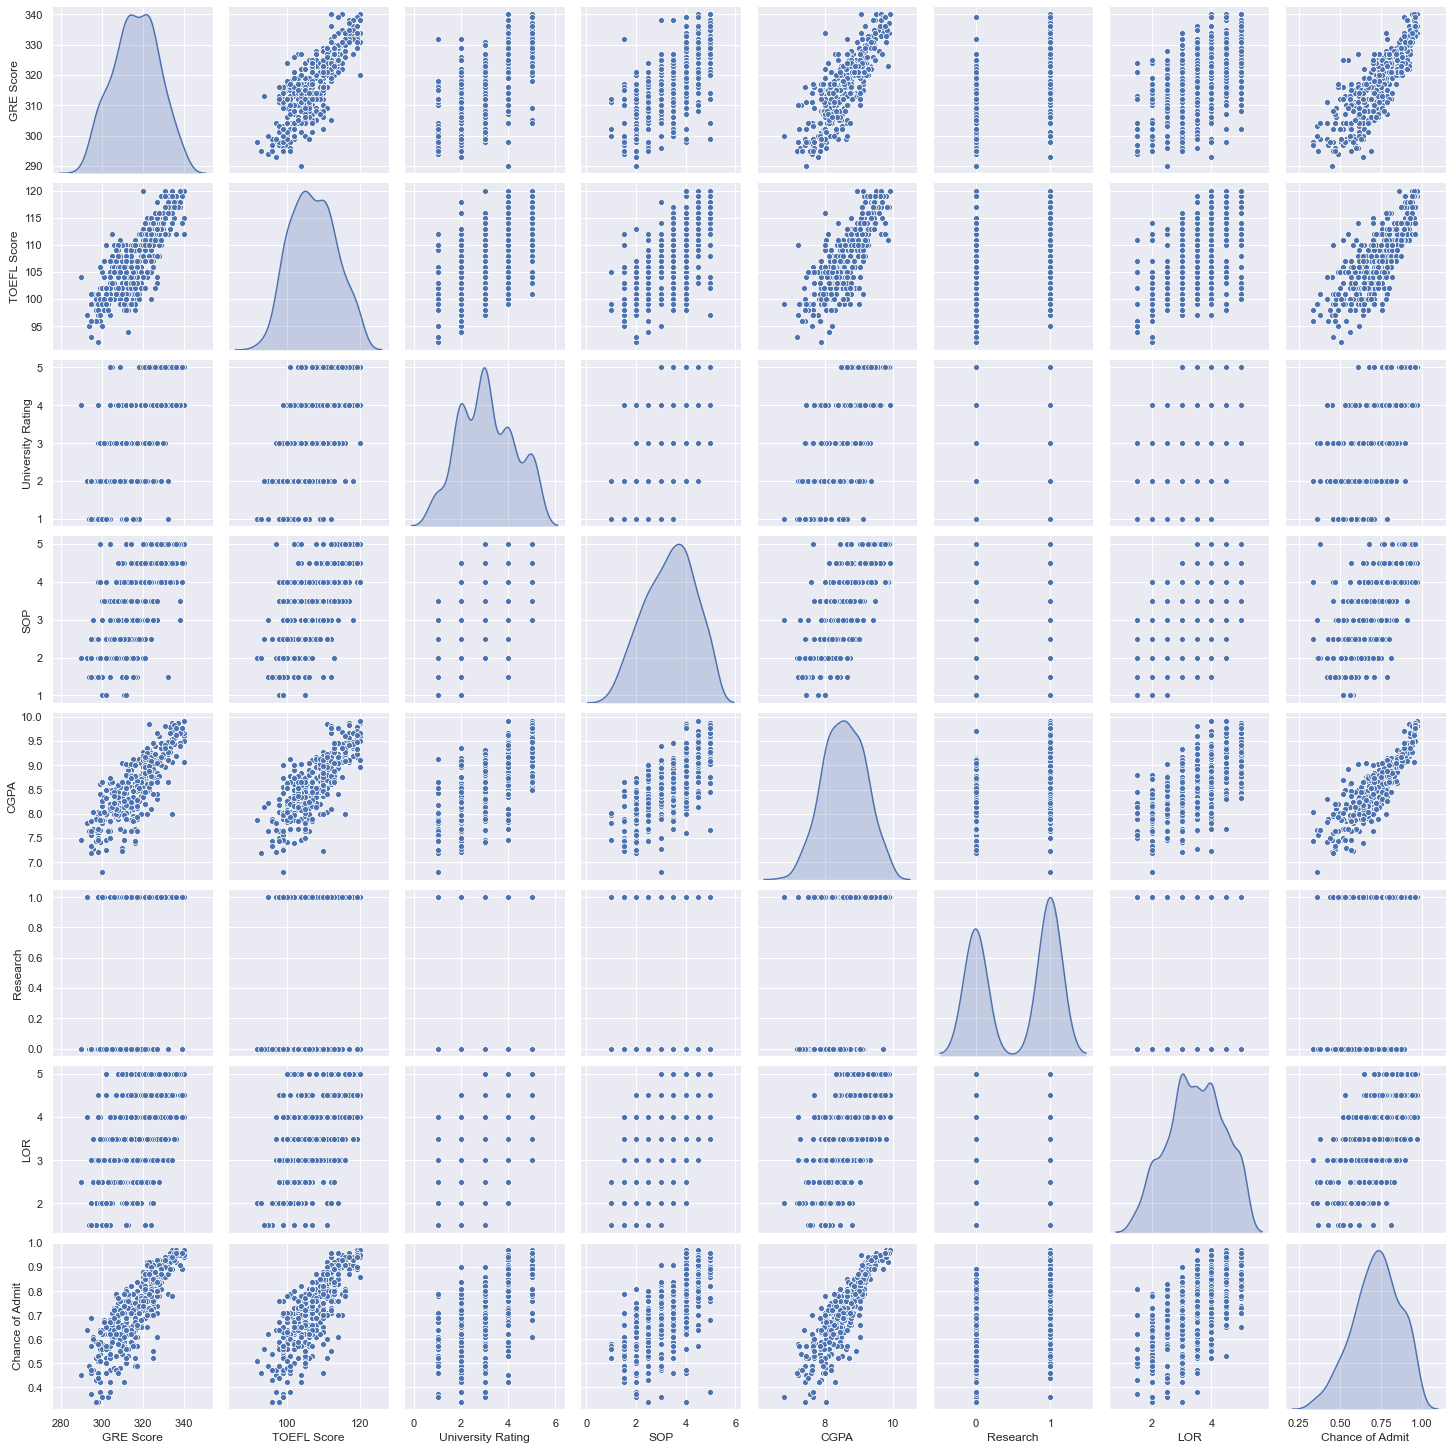

In [25]:
sns.set(color_codes=True)
sns.pairplot(admission, kind="scatter", diag_kind="kde", palette="Set2")

## 5. Deeper Look into Top 3 Correlations
#### i. CGPA

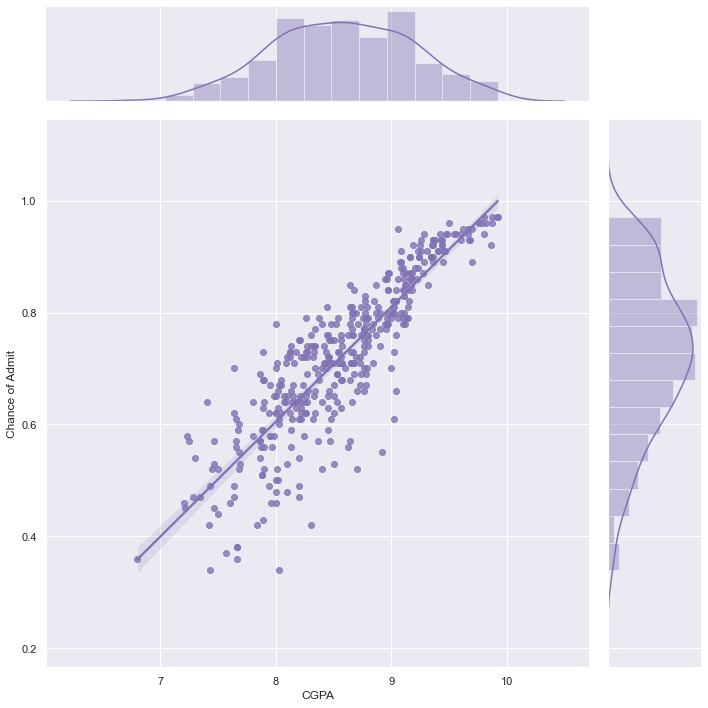

In [33]:
sns.jointplot(x='CGPA', y='Chance of Admit', data=admission, 
              kind="reg", height=10, color='m')

#### ii. GRE Score

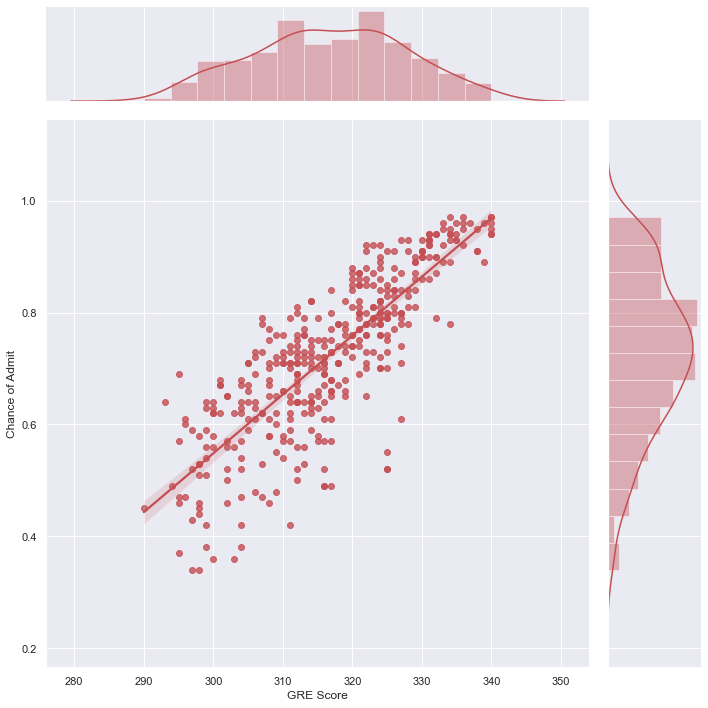

In [35]:
sns.jointplot(x='GRE Score', y='Chance of Admit', data=admission, 
              kind="reg", height=10, color='r')